In [1]:
# Installation of detectron
"""mac os installation: 
create new env with python
conda install pytorch torchvision torchaudio -c pytorch
python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
conda install -c conda-forge opencv
!python -m pip install pyyaml==5.1
"""
!python -m pip install pyyaml==5.1

In [2]:
#### Libraries and packages

import torch, detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

In [3]:
# Version check

!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

zsh:1: command not found: nvcc
torch:  1.13 ; cuda:  1.13.1
detectron2: 0.6


In [4]:
# install tesseract OCR for key-value extraction

!pip install pytesseract

In [5]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools
import cv2
import xml.etree.ElementTree as ET

def get_class_dicts(data_dir):
    classes = ['class_name', 'class_total']
    annotation_files = os.listdir(os.path.join(data_dir,'labels'))
    
    dataset_dicts = []
    for filename in annotation_files:
        if not filename.endswith('.xml'): 
            continue
        record = {}
        root = ET.parse(os.path.join(data_dir, 'labels', filename)
                        ,parser = ET.XMLParser(encoding = "utf-8")).getroot()
                
        record["file_name"] = os.path.join(data_dir, 'images', root.find('filename').text)
        record["image_id"] = root.find('filename').text[:-4]
        record["height"] = int(root.find('size/height').text)
        record["width"] = int(root.find('size/width').text)
        
        objs = []
        
        for member in root.findall('object'):
            obj = {
                'bbox': [int(member[4][0].text), int(member[4][1].text), int(member[4][2].text),
                         int(member[4][3].text)],
                'bbox_mode': BoxMode.XYXY_ABS,
                'category_id': classes.index(member[0].text),
                'iscrowd': 0
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [6]:
from detectron2.data import DatasetCatalog, MetadataCatalog

DatasetCatalog.clear()

classes = ['class_name', 'class_total']

path_test = "../documentations and prior code/Team Project/files/datasets/receipts/test"
path_train = "../documentations and prior code/Team Project/files/datasets/receipts/train"
path_val = "../documentations and prior code/Team Project/files/datasets/receipts/val"

# DatasetCatalog.register('test_dataset', lambda: get_class_dicts(path_test))
# MetadataCatalog.get('test_dataset').set(thing_classes=classes)
# test_metadata = MetadataCatalog.get('test_dataset')

DatasetCatalog.register('train_dataset', lambda: get_class_dicts(path_train))
MetadataCatalog.get('train_dataset').set(thing_classes=classes)
train_metadata = MetadataCatalog.get('train_dataset')

DatasetCatalog.register('val_dataset', lambda: get_class_dicts(path_val))
MetadataCatalog.get('val_dataset').set(thing_classes=classes)
val_metadata = MetadataCatalog.get('val_dataset')

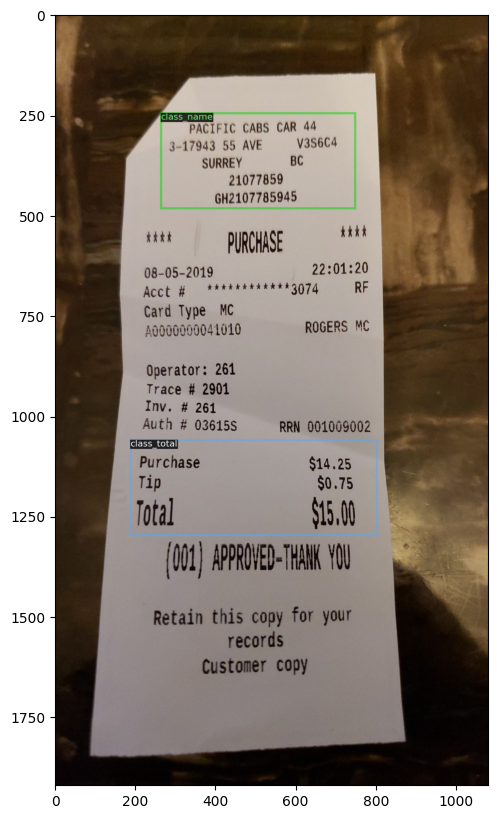

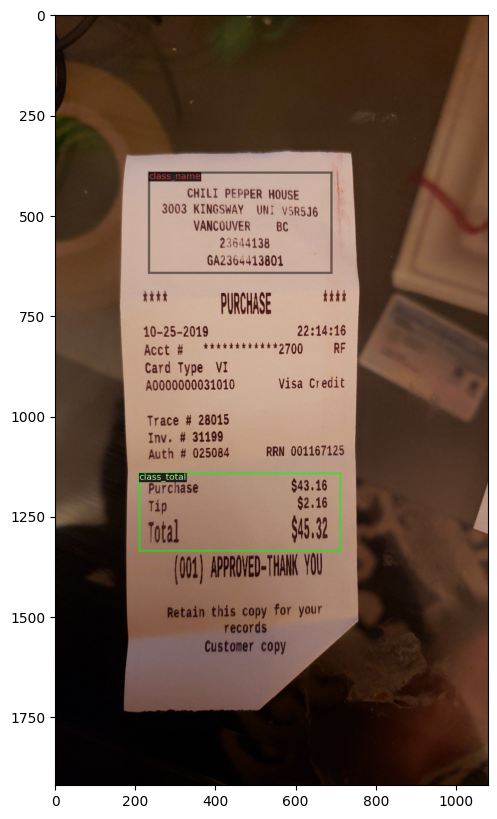

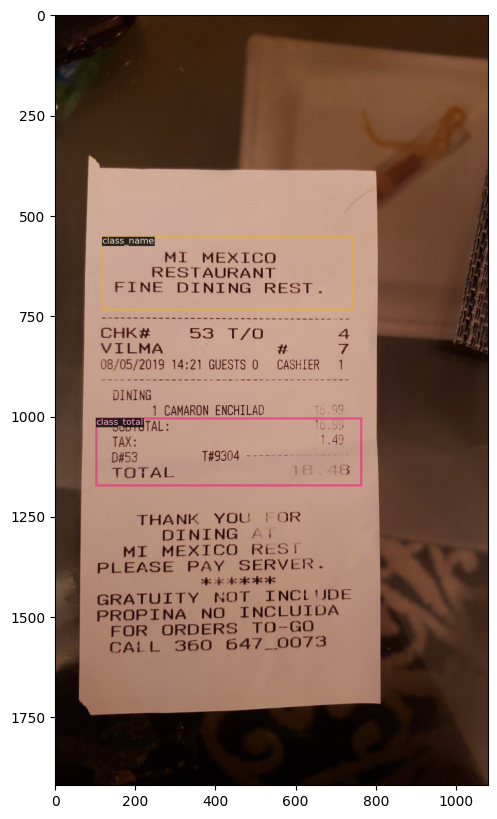

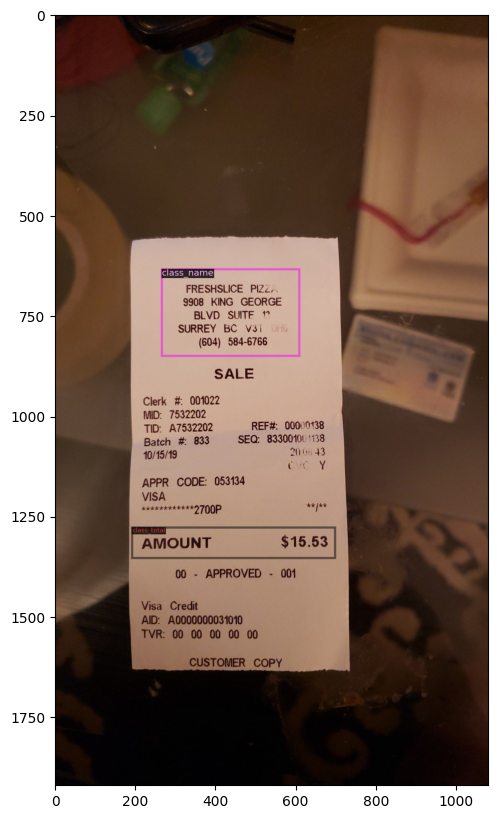

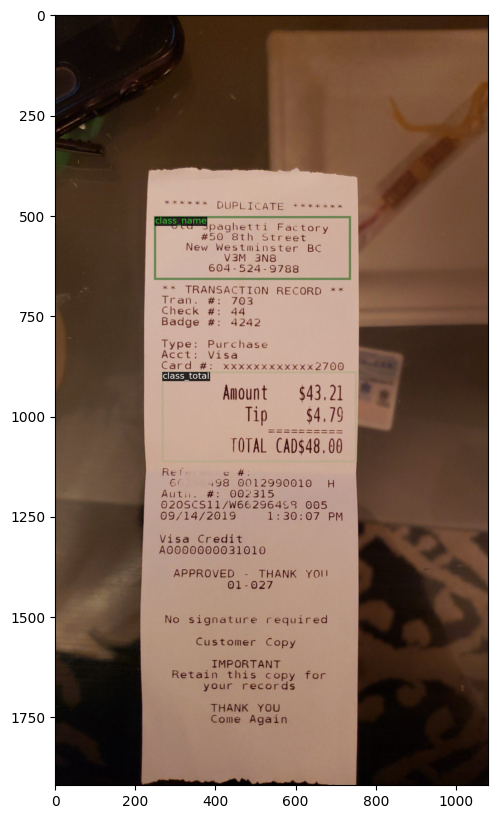

In [7]:
import random
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get('val_dataset')
for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=val_metadata)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(vis.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [8]:
# reshaping json
# import os
# def reshape_jpg(directory):
#     print("loading invoices from", directory)
#     files = os.listdir(directory)
#     for file in files:
#         if not file.endswith('.jpg'):
#             continue
#         filename = f'{file}'
#         print(filename)
#         # Opening JPG file
#         img = cv2.imread(directory+filename)
#         orig = img
#         image = orig
#         display(image.shape)
#         input_width = int(image.shape[1])
#         input_height = int(image.shape[0])
#         image = cv2.resize(image, (input_height, input_width))
#         display(image.shape)
#         cv2.imwrite(directory+filename,image)

# reshape_jpg("../documentations and prior code/Team Project/files/resized_jsons/val/")
# reshape_jpg("../documentations and prior code/Team Project/files/resized_jsons/test/")
# reshape_jpg("../documentations and prior code/Team Project/files/resized_jsons/train/")

In [9]:
# VOC to Coco JSon
# from imgann import Convertor

# # set labelme training data directory
# labelimg_train_folder = "../documentations and prior code/Team Project/files/resized_jsons/train/"

# # set labelme validation data directory
# labelimg_val_folder = "../documentations and prior code/Team Project/files/resized_jsons/val/"

# # set labelme test data directory
# labelimg_test_folder = "../documentations and prior code/Team Project/files/resized_jsons/test/"

# # set path for coco json to be saved
# output_path_train = "../documentations and prior code/Team Project/files/resized_jsons/train_json/train.json"
# output_path_test = "../documentations and prior code/Team Project/files/resized_jsons/test_json/test.json"
# output_path_val = "../documentations and prior code/Team Project/files/resized_jsons/val_json/val.json"

# # create train coco object
# Convertor.voc2coco(labelimg_train_folder,
#                    labelimg_train_folder,
#                    output_path_train)

# # create validation coco object
# Convertor.voc2coco(labelimg_val_folder,
#                    labelimg_val_folder,
#                    output_path_val)

# # create test coco object
# Convertor.voc2coco(labelimg_test_folder,
#                    labelimg_test_folder,
#                    output_path_test)

In [10]:
# # multi json to one
# # import functions
# from labelme2coco import get_coco_from_labelme_folder, save_json

# # set labelme training data directory
# labelme_train_folder = "../documentations and prior code/Team Project/files/resized_jsons/train/"

# # set labelme validation data directory
# labelme_val_folder = "../documentations and prior code/Team Project/files/resized_jsons/val/"

# # set labelme test data directory
# labelme_test_folder = "../documentations and prior code/Team Project/files/resized_jsons/test/"

# # set path for coco json to be saved
# output_path_train = "../documentations and prior code/Team Project/files/resized_jsons/train_json/"
# output_path_test = "../documentations and prior code/Team Project/files/resized_jsons/test_json/"
# output_path_val = "../documentations and prior code/Team Project/files/resized_jsons/val_json/"

# # create train coco object
# train_coco = get_coco_from_labelme_folder(labelme_train_folder)

# # export train coco json
# save_json(train_coco.json, output_path_train+"train.json")

# # create val coco object
# val_coco = get_coco_from_labelme_folder(labelme_val_folder, coco_category_list=train_coco.json_categories)

# # export val coco json
# save_json(val_coco.json, output_path_val+"val.json")
 
# # create test coco object
# test_coco = get_coco_from_labelme_folder(labelme_test_folder, coco_category_list=train_coco.json_categories)

# # export test coco json
# save_json(test_coco.json, output_path_test+"test.json")
        

In [11]:
# deregister
#DatasetCatalog.clear()

In [12]:
# Some basic setup:
# from detectron2.data.datasets import register_coco_instances
# register_coco_instances("my_dataset_train", {},
#                         "../documentations and prior code/Team Project/files/resized_jsons/train_json/train.json",
#                         "../documentations and prior code/Team Project/files/resized_jsons/train/")
# register_coco_instances("my_dataset_val", {},
#                         "../documentations and prior code/Team Project/files/resized_jsons/val_json/val.json",
#                         "../documentations and prior code/Team Project/files/resized_jsons/val/")
# register_coco_instances("my_dataset_test", {},
#                         "../documentations and prior code/Team Project/files/resized_jsons/test_json/test.json",
#                         "../documentations and prior code/Team Project/files/resized_jsons/test/")

In [13]:
#visualize training data
# my_dataset_train_metadata = MetadataCatalog.get("my_dataset_test")
# dataset_dicts = DatasetCatalog.get("my_dataset_test")

# import random
# from detectron2.utils.visualizer import Visualizer

# for d in random.sample(dataset_dicts, 2):
#     img = cv2.imread(d["file_name"])
#     visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
#     vis = visualizer.draw_dataset_dict(d)
#     cv2.imshow("image",vis.get_image()[:, :, ::-1])
#     # add wait key. window waits until user presses a key
#     cv2.waitKey(0)

In [14]:
# Reformating
# from PIL import Image

# """loading all images"""
# def ReformatImagesFromjpg(directory):
#     print("loading invoices from", directory)
#     files = os.listdir(directory)
#     for file in files:
#         if not file.endswith('.jpg'):
#             continue
#         filename = f'{file}'
#         clear_exif(directory + filename)
#     return True

# def clear_exif(path):
#     with Image.open(path, mode='r') as image:
#         # next 3 lines strip exif
#         data = list(image.getdata())
#         image_without_exif = Image.new(image.mode, image.size)
#         image_without_exif.putdata(data)

#         image_without_exif.save(path)
    
# jpg_path = labelme_test_folder
# ReformatImagesFromjpg(jpg_path)
# jpg_path = labelme_train_folder
# ReformatImagesFromjpg(jpg_path)
# jpg_path = labelme_val_folder
# ReformatImagesFromjpg(jpg_path)

In [21]:
# Configuration of Detectron2.0
path_output = "../documentations and prior code/Team Project/files/detectron_output/cfg"
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ('val_dataset',)
cfg.MODEL.DEVICE = "cpu"
cfg.OUTPUT_DIR = path_output

cfg.DATALOADER.NUM_WORKERS = 16
# Let training initialize from model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml") 
cfg.SOLVER.IMS_PER_BATCH = 4
#cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = args.confidence_threshold 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = args.confidence_threshold 
cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = args.confidence_threshold 
cfg.SOLVER.MAX_ITER = 100
#cfg.SOLVER.STEPS = 0.01 
cfg.SOLVER.AMP.ENABLED = False
cfg.SOLVER.BASE_LR = 0.0001  # pick a good LR  
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 # No. of classes = [Name, Address, Date, Total]
cfg.TEST.EVAL_PERIOD = 10

In [22]:
# training class
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        path_output = "../documentations and prior code/Team Project/files/detectron_output/coco_eval"
        os.makedirs(path_output, exist_ok=True)
        output_folder = path_output

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [23]:
# training process
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[12/24 19:22:03 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[12/24 19:22:03 d2.data.build]: Removed 0 images with no usable annotations. 102 images left.
[12/24 19:22:03 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[12/24 19:22:03 d2.data.build]: Using training sampler TrainingSampler
[12/24 19:22:03 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common.NumpySerializedList'>
[12/24 19:22:03 d2.data.common]: Serializing 102 elements to byte tensors and concatenating them all ...
[12/24 19:22:03 d2.data.common]: Serialized dataset takes 0.03 MiB
WARNING [12/24 19:22:03 d2.solver.build]: SOLVER.STEPS contains values larger than SOLVER.MAX_ITER. These values will be ignored.
[12/24 19:22:03 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl 

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Skip loading parameter 'backbone.bottom_up.res2.0.conv1.weight' to the model due to incompatible shapes: (64, 64, 1, 1) in the checkpoint but (256, 64, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res2.0.conv1.norm.weight' to the model due to incompatible shapes: (64,) in the checkpoint but (256,) in the model! You might want to double check if this is expected.
Skip lo

Skip loading parameter 'backbone.bottom_up.res3.0.conv1.norm.running_mean' to the model due to incompatible shapes: (128,) in the checkpoint but (512,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res3.0.conv1.norm.running_var' to the model due to incompatible shapes: (128,) in the checkpoint but (512,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res3.0.conv2.weight' to the model due to incompatible shapes: (128, 128, 3, 3) in the checkpoint but (512, 16, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res3.0.conv2.norm.weight' to the model due to incompatible shapes: (128,) in the checkpoint but (512,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res3.0.conv2.norm.bias' to the model due to incompatible shapes: (128,) in the check

Skip loading parameter 'backbone.bottom_up.res3.3.conv2.norm.running_mean' to the model due to incompatible shapes: (128,) in the checkpoint but (512,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res3.3.conv2.norm.running_var' to the model due to incompatible shapes: (128,) in the checkpoint but (512,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res3.3.conv3.weight' to the model due to incompatible shapes: (512, 128, 1, 1) in the checkpoint but (512, 512, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res4.0.conv1.weight' to the model due to incompatible shapes: (256, 512, 1, 1) in the checkpoint but (1024, 512, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res4.0.conv1.norm.weight' to the model due to incompatible shapes: 

Skip loading parameter 'backbone.bottom_up.res4.3.conv1.norm.bias' to the model due to incompatible shapes: (256,) in the checkpoint but (1024,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res4.3.conv1.norm.running_mean' to the model due to incompatible shapes: (256,) in the checkpoint but (1024,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res4.3.conv1.norm.running_var' to the model due to incompatible shapes: (256,) in the checkpoint but (1024,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res4.3.conv2.weight' to the model due to incompatible shapes: (256, 256, 3, 3) in the checkpoint but (1024, 32, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res4.3.conv2.norm.weight' to the model due to incompatible shapes: (256,) in the c

Skip loading parameter 'backbone.bottom_up.res5.0.conv2.norm.bias' to the model due to incompatible shapes: (512,) in the checkpoint but (2048,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res5.0.conv2.norm.running_mean' to the model due to incompatible shapes: (512,) in the checkpoint but (2048,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res5.0.conv2.norm.running_var' to the model due to incompatible shapes: (512,) in the checkpoint but (2048,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res5.0.conv3.weight' to the model due to incompatible shapes: (2048, 512, 1, 1) in the checkpoint but (2048, 2048, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res5.1.conv1.weight' to the model due to incompatible shapes: (512, 2048, 1, 1)

[12/24 19:22:03 d2.engine.train_loop]: Starting training from iteration 0
[12/24 19:26:31 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[12/24 19:26:31 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common.NumpySerializedList'>
[12/24 19:26:31 d2.data.common]: Serializing 16 elements to byte tensors and concatenating them all ...
[12/24 19:26:31 d2.data.common]: Serialized dataset takes 0.00 MiB
WARNING [12/24 19:26:31 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[12/24 19:26:31 d2.evaluation.evaluator]: Start inference on 16 batches


/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 19:26:53 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0002 s/iter. Inference: 1.7627 s/iter. Eval: 0.0000 s/iter. Total: 1.7629 s/iter. ETA=0:00:08
[12/24 19:26:58 d2.evaluation.evaluator]: Inference done 14/16. Dataloading: 0.0001 s/iter. Inference: 1.7561 s/iter. Eval: 0.0000 s/iter. Total: 1.7566 s/iter. ETA=0:00:03
[12/24 19:28:22 d2.evaluation.evaluator]: Total inference time: 0:01:39.392201 (9.035655 s / iter per device, on 1 devices)
[12/24 19:28:22 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:19 (1.758890 s / iter per device, on 1 devices)
[12/24 19:28:22 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 19:28:22 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_eval/coco_instances_results.json
[12/24 19:28:22 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
WARNING [12/24 19:28:22 d2.evaluation.coco

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 19:33:11 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0003 s/iter. Inference: 1.8689 s/iter. Eval: 0.0000 s/iter. Total: 1.8692 s/iter. ETA=0:00:09
[12/24 19:34:49 d2.evaluation.evaluator]: Inference done 13/16. Dataloading: 0.0003 s/iter. Inference: 1.9180 s/iter. Eval: 0.0000 s/iter. Total: 1.9185 s/iter. ETA=0:00:05
[12/24 19:34:55 d2.evaluation.evaluator]: Inference done 16/16. Dataloading: 0.0003 s/iter. Inference: 1.8894 s/iter. Eval: 0.0000 s/iter. Total: 1.8899 s/iter. ETA=0:00:00
[12/24 19:52:11 d2.evaluation.evaluator]: Total inference time: 0:01:40.832705 (9.166610 s / iter per device, on 1 devices)
[12/24 19:52:11 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:20 (1.889406 s / iter per device, on 1 devices)
[12/24 19:52:11 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 19:52:11 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_e

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 20:26:39 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0001 s/iter. Inference: 1.8835 s/iter. Eval: 0.0000 s/iter. Total: 1.8837 s/iter. ETA=0:00:09
[12/24 20:26:45 d2.evaluation.evaluator]: Inference done 14/16. Dataloading: 0.0002 s/iter. Inference: 1.8636 s/iter. Eval: 0.0000 s/iter. Total: 1.8640 s/iter. ETA=0:00:03
[12/24 20:32:58 d2.evaluation.evaluator]: Total inference time: 0:01:40.514271 (9.137661 s / iter per device, on 1 devices)
[12/24 20:32:58 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:20 (1.860482 s / iter per device, on 1 devices)
[12/24 20:32:58 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 20:32:58 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_eval/coco_instances_results.json
[12/24 20:32:58 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
WARNING [12/24 20:32:58 d2.evaluation.coco

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 20:37:48 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0001 s/iter. Inference: 1.9547 s/iter. Eval: 0.0000 s/iter. Total: 1.9548 s/iter. ETA=0:00:09
[12/24 20:37:53 d2.evaluation.evaluator]: Inference done 14/16. Dataloading: 0.0002 s/iter. Inference: 1.9311 s/iter. Eval: 0.0000 s/iter. Total: 1.9316 s/iter. ETA=0:00:03
[12/24 20:39:17 d2.evaluation.evaluator]: Total inference time: 0:01:41.051390 (9.186490 s / iter per device, on 1 devices)
[12/24 20:39:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:21 (1.909988 s / iter per device, on 1 devices)
[12/24 20:39:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 20:39:17 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_eval/coco_instances_results.json
[12/24 20:39:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
WARNING [12/24 20:39:17 d2.evaluation.coco

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 20:44:10 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0002 s/iter. Inference: 1.8853 s/iter. Eval: 0.0000 s/iter. Total: 1.8856 s/iter. ETA=0:00:09
[12/24 20:44:16 d2.evaluation.evaluator]: Inference done 14/16. Dataloading: 0.0002 s/iter. Inference: 1.9055 s/iter. Eval: 0.0000 s/iter. Total: 1.9058 s/iter. ETA=0:00:03
[12/24 20:45:40 d2.evaluation.evaluator]: Total inference time: 0:01:40.939829 (9.176348 s / iter per device, on 1 devices)
[12/24 20:45:40 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:20 (1.899408 s / iter per device, on 1 devices)
[12/24 20:45:40 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 20:45:40 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_eval/coco_instances_results.json
[12/24 20:45:40 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
WARNING [12/24 20:45:40 d2.evaluation.coco

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 20:50:20 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0001 s/iter. Inference: 1.8649 s/iter. Eval: 0.0000 s/iter. Total: 1.8650 s/iter. ETA=0:00:09
[12/24 20:50:25 d2.evaluation.evaluator]: Inference done 14/16. Dataloading: 0.0002 s/iter. Inference: 1.8559 s/iter. Eval: 0.0000 s/iter. Total: 1.8563 s/iter. ETA=0:00:03
[12/24 20:51:49 d2.evaluation.evaluator]: Total inference time: 0:01:40.413212 (9.128474 s / iter per device, on 1 devices)
[12/24 20:51:49 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:20 (1.852191 s / iter per device, on 1 devices)
[12/24 20:51:49 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 20:51:49 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_eval/coco_instances_results.json
[12/24 20:51:49 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
WARNING [12/24 20:51:49 d2.evaluation.coco

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 20:56:26 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0004 s/iter. Inference: 1.8150 s/iter. Eval: 0.0000 s/iter. Total: 1.8155 s/iter. ETA=0:00:09
[12/24 20:56:31 d2.evaluation.evaluator]: Inference done 14/16. Dataloading: 0.0003 s/iter. Inference: 1.8258 s/iter. Eval: 0.0000 s/iter. Total: 1.8263 s/iter. ETA=0:00:03
[12/24 20:57:55 d2.evaluation.evaluator]: Total inference time: 0:01:40.171085 (9.106462 s / iter per device, on 1 devices)
[12/24 20:57:55 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:20 (1.828635 s / iter per device, on 1 devices)
[12/24 20:57:55 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 20:57:55 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_eval/coco_instances_results.json
[12/24 20:57:55 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
WARNING [12/24 20:57:55 d2.evaluation.coco

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 21:02:38 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0002 s/iter. Inference: 1.8179 s/iter. Eval: 0.0000 s/iter. Total: 1.8181 s/iter. ETA=0:00:09
[12/24 21:02:44 d2.evaluation.evaluator]: Inference done 14/16. Dataloading: 0.0002 s/iter. Inference: 1.8138 s/iter. Eval: 0.0000 s/iter. Total: 1.8141 s/iter. ETA=0:00:03
[12/24 21:04:07 d2.evaluation.evaluator]: Total inference time: 0:01:40.236062 (9.112369 s / iter per device, on 1 devices)
[12/24 21:04:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:20 (1.836154 s / iter per device, on 1 devices)
[12/24 21:04:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 21:04:07 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_eval/coco_instances_results.json
[12/24 21:04:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
WARNING [12/24 21:04:07 d2.evaluation.coco

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 21:08:56 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0001 s/iter. Inference: 1.7766 s/iter. Eval: 0.0000 s/iter. Total: 1.7768 s/iter. ETA=0:00:08
[12/24 21:09:02 d2.evaluation.evaluator]: Inference done 14/16. Dataloading: 0.0001 s/iter. Inference: 1.8451 s/iter. Eval: 0.0000 s/iter. Total: 1.8454 s/iter. ETA=0:00:03
[12/24 21:10:26 d2.evaluation.evaluator]: Total inference time: 0:01:40.658447 (9.150768 s / iter per device, on 1 devices)
[12/24 21:10:26 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:20 (1.874644 s / iter per device, on 1 devices)
[12/24 21:10:26 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 21:10:26 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_eval/coco_instances_results.json
[12/24 21:10:26 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
WARNING [12/24 21:10:26 d2.evaluation.coco

/opt/homebrew/Caskroom/miniforge/base/envs/detection2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12/24 21:15:14 d2.evaluation.evaluator]: Inference done 11/16. Dataloading: 0.0001 s/iter. Inference: 1.8259 s/iter. Eval: 0.0000 s/iter. Total: 1.8260 s/iter. ETA=0:00:09
[12/24 21:15:19 d2.evaluation.evaluator]: Inference done 14/16. Dataloading: 0.0002 s/iter. Inference: 1.8217 s/iter. Eval: 0.0000 s/iter. Total: 1.8221 s/iter. ETA=0:00:03
[12/24 21:16:43 d2.evaluation.evaluator]: Total inference time: 0:01:40.236271 (9.112388 s / iter per device, on 1 devices)
[12/24 21:16:43 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:20 (1.835999 s / iter per device, on 1 devices)
[12/24 21:16:43 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/24 21:16:43 d2.evaluation.coco_evaluation]: Saving results to ../documentations and prior code/Team Project/files/detectron_output/coco_eval/coco_instances_results.json
[12/24 21:16:43 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
WARNING [12/24 21:16:43 d2.evaluation.coco

In [24]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir "../documentations and prior code/Team Project/files/detectron_output/coco_eval/"

In [23]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

DatasetCatalog.register('test_dataset', lambda: get_class_dicts(path_test))
MetadataCatalog.get('test_dataset').set(thing_classes=classes)
test_metadata = MetadataCatalog.get('test_dataset')

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor = DefaultPredictor(cfg)
path_output = "../documentations and prior code/Team Project/files/detectron_output/coco_eval"
evaluator = COCOEvaluator("test_dataset", cfg, False, output_dir=path_output)
val_loader = build_detection_test_loader(cfg, "test_dataset")
inference_on_dataset(trainer.model, val_loader, evaluator)

[12/24 18:59:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ../documentations and prior code/Team Project/files/detectron_output/cfg/model_final.pth ...
WARNING [12/24 18:59:28 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.


FileNotFoundError: [Errno 2] No such file or directory: '../documentations and prior code/Team Project/files/detectron_output/coco_eval/test_dataset_coco_format.json'

[12/24 21:27:44 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ../documentations and prior code/Team Project/files/detectron_output/cfg/model_final.pth ...


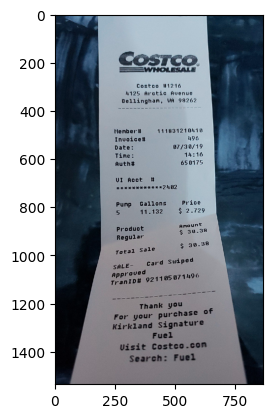

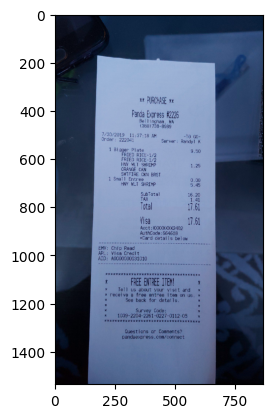

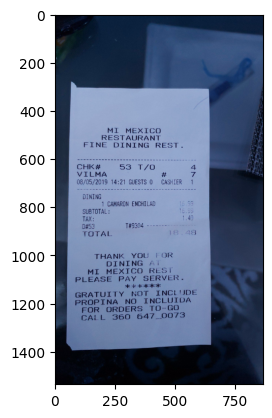

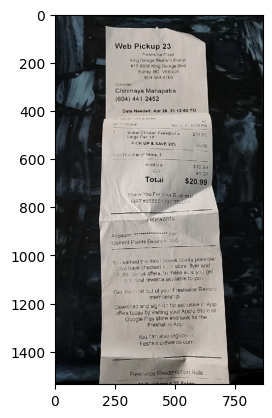

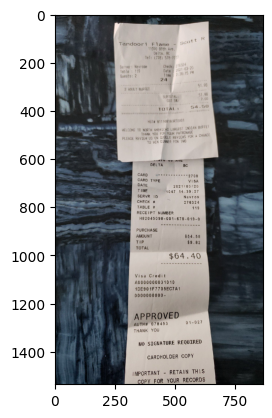

In [27]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("test_dataset", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("test_dataset")

from detectron2.utils.visualizer import ColorMode
import glob
#from google.colab.patches import cv2_imshow

# dataset_dicts = DatasetCatalog.get('val_dataset')
# for d in random.sample(dataset_dicts, 5):
#     img = cv2.imread(d["file_name"])
#     visualizer = Visualizer(img[:, :, ::-1], metadata=val_metadata)
#     vis = visualizer.draw_dataset_dict(d)
#     plt.figure(figsize = (14, 10))
#     plt.imshow(cv2.cvtColor(vis.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
#     plt.show()
    
for imageName in glob.glob(path_test+'/images/*jpg'):
    im = cv2.imread(imageName)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.show()

In [ ]:
# crop image and pass it to tesseract using bbox information
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pytesseract
df = pd.DataFrame(columns=['Name', 'Address', 'Total', 'Date'])
for d in random.sample(test_dataset_dicts, 1):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    pred_classes = outputs["instances"].pred_classes.tolist()
    pred_bboxes = outputs["instances"].pred_boxes.tensor.tolist()
    class_dict = {0: 'Name', 1: 'Address', 2: 'Total', 3: 'Date' }
    name_list = []
    address_list = []
    date_list = []
    total_list = []
    for bbox in range(len(pred_bboxes)):
      tup = (class_dict[pred_classes[bbox]], pred_bboxes[bbox])
      print(tup[0])
      x = int(tup[1][0])
      y = int(tup[1][1])
      w = int(tup[1][2])
      h = int(tup[1][3])
    # x = int(outputs["instances"].pred_boxes[0].tensor.tolist()[0][0])
    # y = int(outputs["instances"].pred_boxes[0].tensor.tolist()[0][1])
    # w = int(outputs["instances"].pred_boxes[0].tensor.tolist()[0][2])
    # h = int(outputs["instances"].pred_boxes[0].tensor.tolist()[0][3])
      crop_img = im[y:h, x:w]
      cv2.imwrite("../documentations and prior code/Team Project/files/detectron_output/" + "cropped_" + str(bbox) + ".jpg", crop_img)
      print(type(crop_img))
      cv2_imshow(crop_img)
      pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')
      cropped_img = cv2.imread("/content/drive/MyDrive/output/" + "cropped_" + str(bbox) + ".jpg")
      text = pytesseract.image_to_string(cropped_img, lang='eng', config='-psm 1')
      print(text)
      if (tup[0]) == 'Name':
        name_list.append(text)
      elif (tup[0]) == 'Address':
        address_list.append(text)
      elif (tup[0]) == 'Total':
        total_list.append(text)
      elif (tup[0]) == 'Date':
        date_list.append(text)      
    df = df.append({'Name': name_list, 'Address': address_list, 'Total': total_list, 'Date': date_list}, ignore_index=True)
    print(df)
    #df.to_excel("/content/drive/MyDrive/output/sample.xlsx")
